# Catlinh Nguyen
Student ID: 1977169
UCSC Spring 2025 Final project

There are 16 steps in this notebook.

 # Step 1: Import astropy.io.fits and related modules

In [3]:
# Packages to do image processing using astropy.io.fits
import numpy as np
import sep

# Additional setup for reading images and plotting
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Ellipse

# Additional imports for file/directory
import os

# Reference URLs
# https://docs.astropy.org/en/stable/io/fits/index.html#module-astropy.io.fits (astropy fits to use)
# https://docs.astropy.org/en/stable/io/fits/appendix/faq.html 
# https://philuttley.github.io/prog4aa_lesson2/10-fitsfiles/index.html (explain FITS file)
# https://sep.readthedocs.io/en/stable/tutorial.html (SEP Tutorial to follow)


# Step 2: Set up MathPlot and rc parameters to 10x8 inches
Tell Jupyter to display a mathplot graph directly on the Python notebook.
Set the size of the graph to 10x8 inches.

In [2]:

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]



# Step 3: Open download file,
inspect and extract content, convert content to float and display.
Following step [3] and [4] of the tutorial, read the fits image into a standard 2-dimensional array.
Save the output to a file.

Input: "jw02731-o001_t017_nircam_clear-f090w_i2d.fits"
Ouput: "image1.png"

Filename: c:\1-UCSC\Spring 2025\ASTR-19\Final-project\data\file1\jw02731-o001_t017_nircam_clear-f090w_i2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     365   ()      
  1  SCI           1 ImageHDU        75   (14339, 8582)   float32   
  2  ERR           1 ImageHDU        10   (14339, 8582)   float32   
  3  CON           1 ImageHDU        10   (14339, 8582, 6)   int32   
  4  WHT           1 ImageHDU         9   (14339, 8582)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (14339, 8582)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (14339, 8582)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (14339, 8582)   float32   
  8  HDRTAB        1 BinTableHDU    532   160R x 261C   [23A, 5A, 3A, 45A, 6A, 13A, 7A, 5A, 6A, 7A, 10A, 4A, L, D, D, 32A, 50A, 32A, 21A, 3A, 3A, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 14A, 23A, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 8A, 8A, 5A, D, D, D, D, D, D, 27A, 

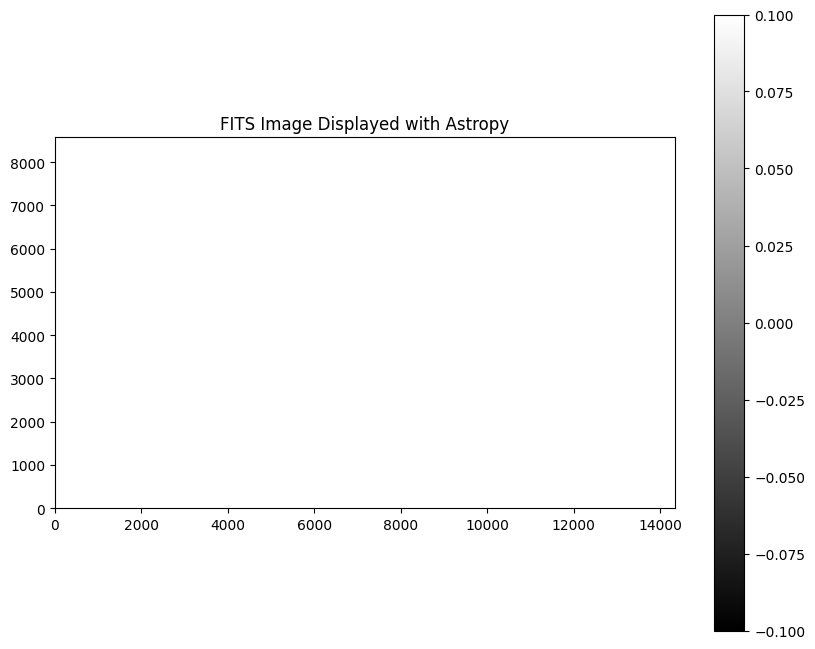

In [5]:
# Plot 4 graphs and save to 4 PNG files called "image[1..4].png".
# This section generates image1.png
# [3], [4]
# 3.1 SHOW THE IMAGE
import os

cwd = os.getcwd()

# f_name = "image.fits"
# (file below is required for next step of project)
f_name = "jw02731-o001_t017_nircam_clear-f090w_i2d.fits"
#
# Construct a file path so that it works on both Linux and Windows
filename = os.path.join(cwd,"data","file1",f_name)
if not os.path.exists(filename):
    exit(f"File {filename} doesn't exists!")

hdul = fits.open(filename)
# Display info
hdul.info()

# Get data and convert to float for SEP
# data = hdul[0].data.astype(np.float32)

# Try accessing the 'SCI' extension if it exists
if 'SCI' in hdul:
    data = hdul['SCI'].data.astype(np.float32)
else:
    if hdul[0].data is not None:
        data = hdul[0].data.astype(np.float32)
    else:
        data = hdul[1].data.astype(np.float32)  # Fallback: use first extension after primary

# Display the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.title("FITS Image Displayed with Astropy")

# Save image to PNG
plt.savefig("image1.png", dpi=150, bbox_inches='tight')  # optional: dpi & cropping
# (must savefig() before show())
plt.show()

# Close data
hdul.close()


# Step 5: Following step 5..11 in the Tutorials, do:
Create empty mask
Estimate the background
Evaluate background noise
Plot the background noise
Finally Subtract background to get a clear image
Save to image2.png and image3.png

Global Background Mean: 1.1997147798538208
Global Background RMS: 0.06582547724246979


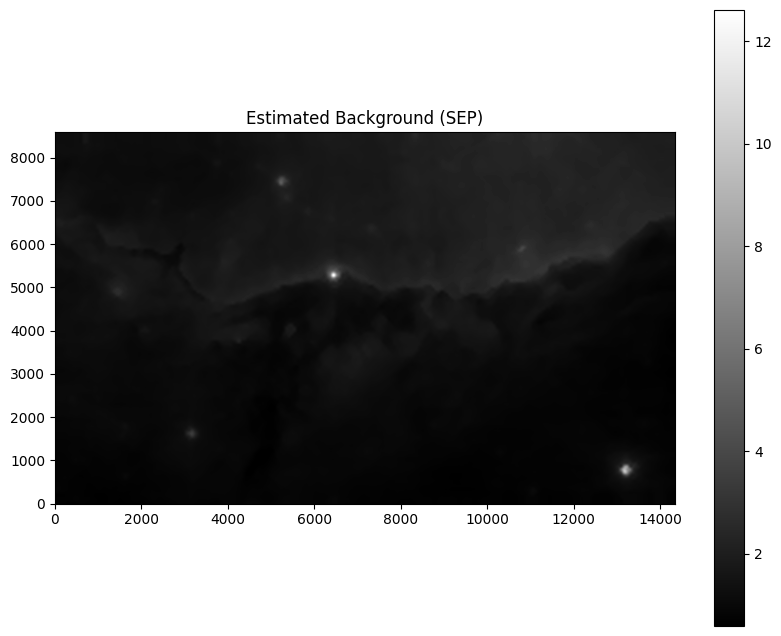

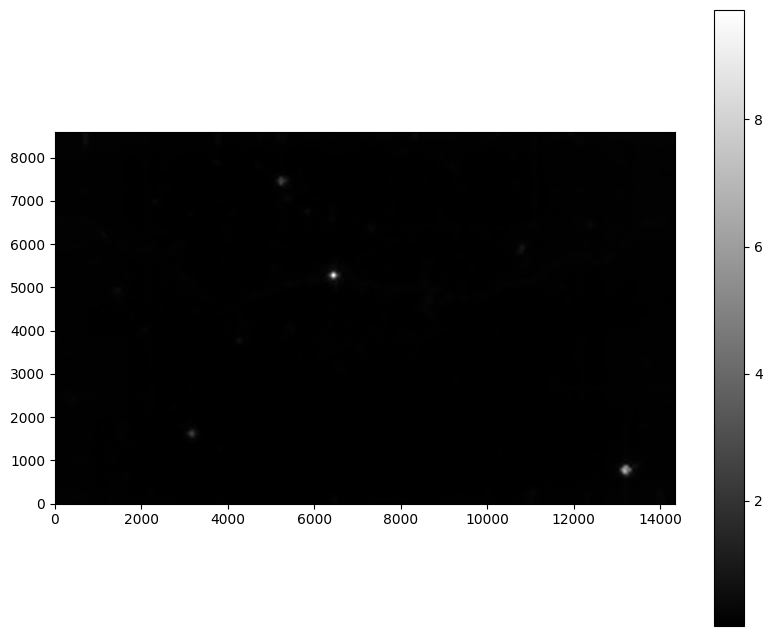

In [6]:
# Plot 4 graphs and save to 4 PNG files called "image[1..4].png".
# This section generates image[2..4].png
# # [5]
# Create an empty mask (no pixels are masked)
mask = np.zeros_like(data, dtype=bool)

# Measure the background with a 64x64 grid and 3x3 filter for smoothing
bkg = sep.Background(data, mask=mask, bw=64, bh=64, fw=3, fh=3)

# [6]
# --- Step 4: Print global background stats ---
print("Global Background Mean:", bkg.globalback)
print("Global Background RMS:", bkg.globalrms)
# [7]
# --- Step 5: Show the 2D background model ---
bkg_image = bkg.back()
# [8]
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title("Estimated Background (SEP)")
# Save image to PNG
plt.savefig("image2.png", dpi=150, bbox_inches='tight')  # optional: dpi & cropping
plt.show()

# [9]
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()
# show the background noise
# [10]
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
# Save image to PNG
plt.savefig("image3.png", dpi=150, bbox_inches='tight')  # optional: dpi & cropping
# [11]
# subtract the background
data_sub = data - bkg

# Step 4: Following step 12, 13 of Tutorials, extract objects above 1.5× RMS noise threshold
Use a threshhold of 1.5 x local noise RMS. Ignore pixels not brighter than this number
to set a better image.
Count the number of selected objects.

The file jw02731-o001_t017_nircam_clear-f090w_i2d.fits is too big, so I have to increase
the threshhold from 1.5 to 20.
I tried setting sep.set_extract_pixstack(1000000). It worked but VS hang.

In [11]:
# Extract objects above 1.5× RMS noise threshold ---
# (for part-2 since image file is too big, I have to set threshhold to 20)
# 
# [12]
objects = sep.extract(data_sub, thresh=20, err=bkg.globalrms)
# [13]
len(objects)

9309

# How many sources?
9309 sources


# Step 5: Following step 14 of Tutorials, plot the subtracted background.
Display the subtracted image in prev. step. 
Draw a red ellipses around each detected object.
Save to image4.png

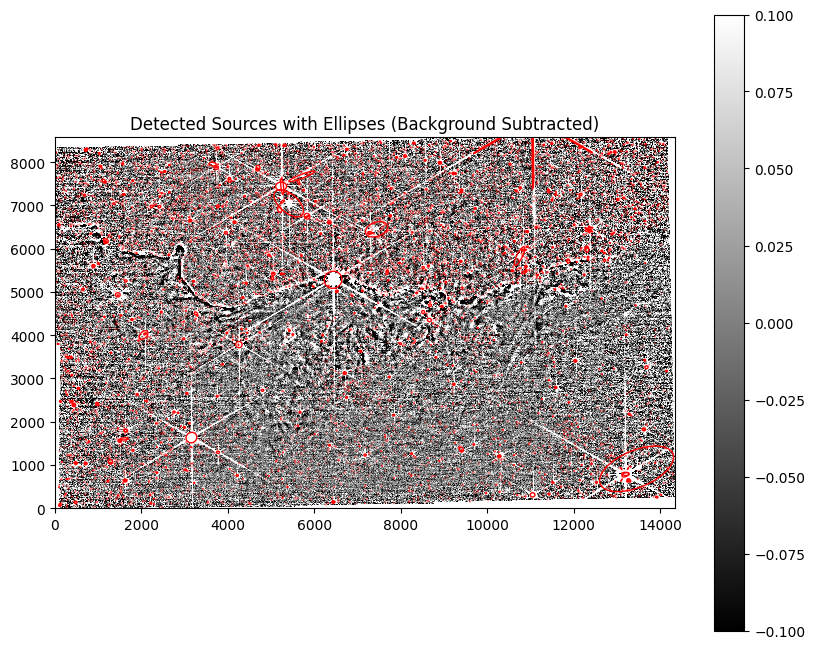

In [12]:
# [14]
# Plot background-subtracted image ---
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m - s, vmax=m + s, origin='lower')

# Plot ellipses for detected objects ---
for obj in objects:
    e = Ellipse(xy=(obj['x'], obj['y']),
                width=6 * obj['a'],
                height=6 * obj['b'],
                angle=obj['theta'] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.title("Detected Sources with Ellipses (Background Subtracted)")
plt.colorbar(im)
# Save image to PNG
plt.savefig("image4.png", dpi=150, bbox_inches='tight')  # optional: dpi & cropping
plt.show()

# Step 6: Following step 15 of Tutorials, 
print available fields (columns) for each detected object in prev. step.

In [13]:
# available fields
# [15]
objects = sep.extract(data_sub, thresh=10, err=bkg.globalrms)
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

# Step 7: Following step 16, 17 of Tutoralial, do Aperture photometry
Set up aperture
Print the results

Photometry for first 10 objects:
Object 0: flux = 36.590 ± 6.059
Object 1: flux = 11.585 ± 3.422
Object 2: flux = 249.576 ± 15.802
Object 3: flux = 36.326 ± 6.037
Object 4: flux = 474.404 ± 21.784
Object 5: flux = 15.155 ± 3.909
Object 6: flux = 56.967 ± 7.556
Object 7: flux = 80.441 ± 8.976
Object 8: flux = 21.401 ± 4.639
Object 9: flux = 15.415 ± 3.942


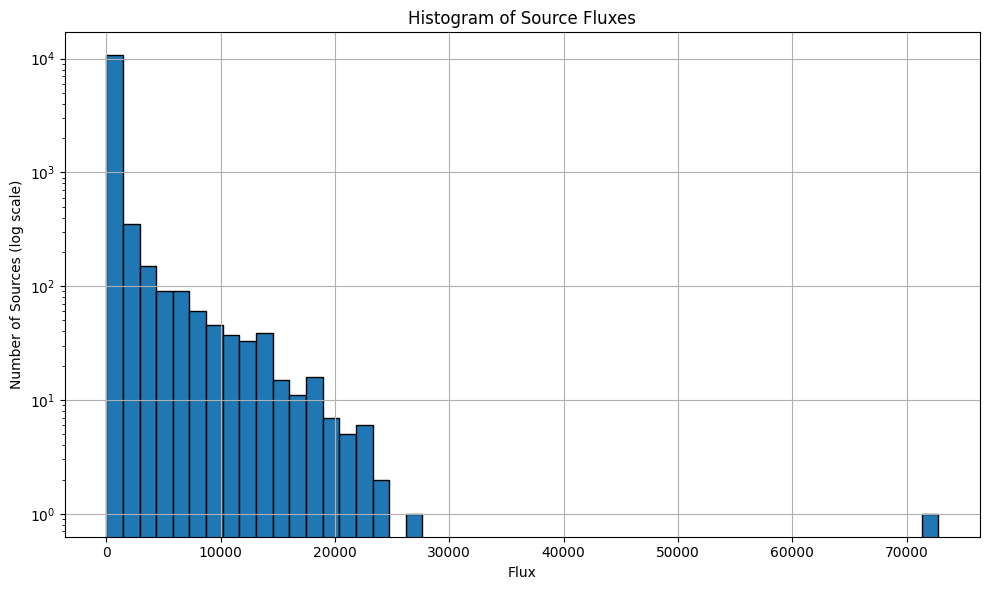

In [14]:
# Perform circular aperture photometry ---
# Use aperture radius = 3.0 pixels, gain = 1.0
# [16]
flux, fluxerr, flag = sep.sum_circle(
    data_sub,
    objects['x'], objects['y'],
    3.0,
    err=bkg.globalrms,
    gain=1.0
)
# [17] show the first 10 objects results:
# --- Step 5: Print photometry results for the first 10 objects ---
print("Photometry for first 10 objects:")
for i in range(min(10, len(flux))):
    print("Object {:d}: flux = {:.3f} ± {:.3f}".format(i, flux[i], fluxerr[i]))

# Extend code to do Histograms of fluxes
# Filter out invalid fluxes (e.g., negative or nan)
flux = flux[np.isfinite(flux) & (flux > 0)]

# Plot histogram (log scale recommended)
plt.figure(figsize=(10, 6))
plt.hist(flux, bins=50, log=True, edgecolor='black')
plt.xlabel("Flux")
plt.ylabel("Number of Sources (log scale)")
plt.title("Histogram of Source Fluxes")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Set byte order for Numpy >= 2.0
Preserve the original data, set up byte order for Numpy's version >= 2.0

In [15]:
# Numpy >= 2.0
# Copies data to a new array, preserves the ordering of the original array
new_data = data.astype(data.dtype.newbyteorder("="))
# The same outcome as the previous operation
new_data = data.byteswap()
new_data = new_data.view(new_data.dtype.newbyteorder("="))
# Changes data in-place
data = data.byteswap()
data = data.view(data.dtype.newbyteorder("="))

# Step 9: Correct treatment in presence of variable noise,
save to file "synthetic_image.fits"
output: "synthetic_image.fits

Set up a grid 
Create an error map with random noises to insert fake source
Save the fits file and display the image

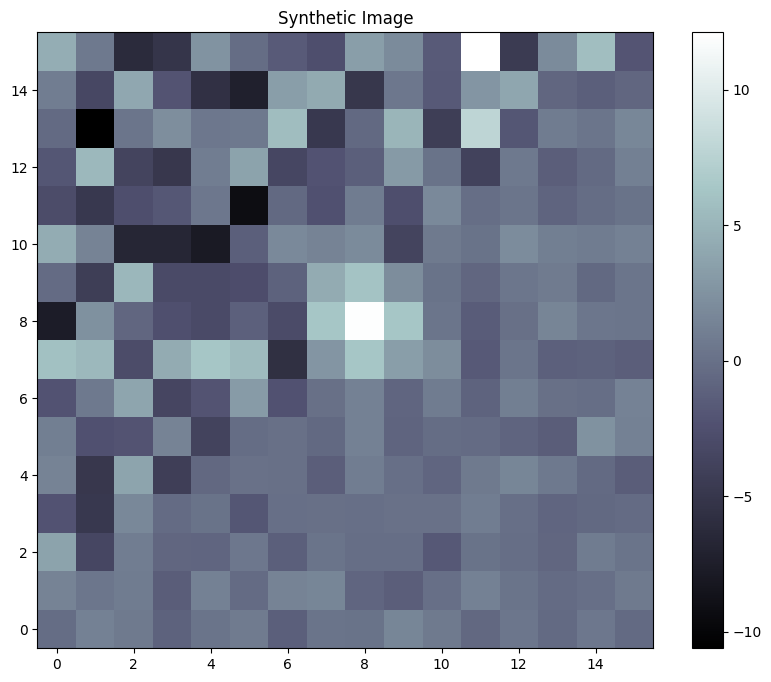

In [16]:
# Generate synthetic data ---
n = 16
X, Y = np.meshgrid(np.arange(n), np.arange(n))
mask = Y > X

error = np.ones((n, n))
error[mask] = 4.0
data = error * np.random.normal(size=(n, n))

# Add a fake source to the center
source = 3.0 * np.array([[1., 2., 1.],
                         [2., 4., 2.],
                         [1., 2., 1.]])
m = n // 2 - 1
data[m:m+3, m:m+3] += source

# Save to FITS using astropy.io.fits ---
hdu = fits.PrimaryHDU(data)
hdu.writeto("synthetic_image.fits", overwrite=True)

# Display the image ---
plt.imshow(data, interpolation='nearest', origin='lower', cmap='bone')
plt.title("Synthetic Image")
plt.colorbar()
plt.show()

# mean, median, and standard deviation of the flux distribution

In [18]:
# Perform circular aperture photometry ---
# Use aperture radius = 3.0 pixels, gain = 1.0
# [16]
flux, fluxerr, flag = sep.sum_circle(
    data_sub,
    objects['x'], objects['y'],
    3.0,
    err=bkg.globalrms,
    gain=1.0
)

# Filtered fluxes from SEP (already cleaned: > 0, finite)
valid_flux = flux[np.isfinite(flux) & (flux > 0)]

# Calculate statistics
mean_flux = np.mean(valid_flux)
median_flux = np.median(valid_flux)
std_flux = np.std(valid_flux)

# Display results
print(f"Mean flux:   {mean_flux:.3f}")
print(f"Median flux: {median_flux:.3f}")
print(f"Std. Dev:    {std_flux:.3f}")

Mean flux:   642.824
Median flux: 56.787
Std. Dev:    2227.323


# Find largest outliers, locations on pic and how many deviations away?
(Remember to use the same threshhod 20 to avoid too many pixels)

In [19]:
# Perform circular aperture photometry ---
# Use aperture radius = 3.0 pixels, gain = 1.0
# [16]
flux, fluxerr, flag = sep.sum_circle(
    data_sub,
    objects['x'], objects['y'],
    3.0,
    err=bkg.globalrms,
    gain=1.0
)

# Assume flux is your NumPy array (1D or 2D)
valid_mask = np.isfinite(flux) & (flux > 0)
valid_flux = flux[valid_mask]

# Calculate stats
mean_flux = np.mean(valid_flux)
median_flux = np.median(valid_flux)
std_flux = np.std(valid_flux)

print(f"Mean flux:   {mean_flux:.3f}")
print(f"Median flux: {median_flux:.3f}")
print(f"Std. Dev:    {std_flux:.3f}")

# Z-score array
z_scores = np.full_like(flux, fill_value=-np.inf, dtype=float)
z_scores[valid_mask] = (flux[valid_mask] - mean_flux) / std_flux

# Top 10 outliers
flat_indices = np.argpartition(z_scores.flatten(), -10)[-10:]
top_indices = flat_indices[np.argsort(z_scores.flatten()[flat_indices])[::-1]]

# Get original positions
positions = [np.unravel_index(i, flux.shape) for i in top_indices]

print("\n=== Top 10 Flux Outliers with position in image and how far away from std. dev. ===")
for i, pos in enumerate(positions):
    flux_val = flux[pos]
    z = z_scores[pos]
    if flux.ndim == 1:
        print(f"{i+1}. Index {pos[0]} - Flux: {flux_val:.2f} - Z-score: {z:.2f}")
    else:
        print(f"{i+1}. Position (y={pos[0]}, x={pos[1]}) - Flux: {flux_val:.2f} - Z-score: {z:.2f}")


Mean flux:   642.824
Median flux: 56.787
Std. Dev:    2227.323

=== Top 10 Flux Outliers with position in image and how far away from std. dev. ===
1. Index 2131 - Flux: 72769.95 - Z-score: 32.38
2. Index 5450 - Flux: 27337.11 - Z-score: 11.98
3. Index 665 - Flux: 24508.82 - Z-score: 10.72
4. Index 5729 - Flux: 23719.89 - Z-score: 10.36
5. Index 421 - Flux: 22915.93 - Z-score: 10.00
6. Index 1036 - Flux: 22725.42 - Z-score: 9.91
7. Index 6781 - Flux: 22668.95 - Z-score: 9.89
8. Index 5480 - Flux: 22603.85 - Z-score: 9.86
9. Index 12000 - Flux: 22423.90 - Z-score: 9.78
10. Index 6538 - Flux: 22119.26 - Z-score: 9.64


# Answer
The largest outlier is at index 2131, Flux 72769.95. It is 32.38 standard deviations above the mean.

# Step 10: Extract sources using 'conv' and 'matched' filter.

In [24]:
# Extract sources using filter_type='conv' ---
objects_conv = sep.extract(data, thresh=20, err=error, filter_type='conv')

#  Extract sources using filter_type='matched' ---
objects_matched = sep.extract(data, thresh=20, err=error, filter_type='matched')

# Step 11: Derivation of the matched filter formula with different subpixel sampling,
then display first 3 objects.

In [25]:
# Detect sources ---
objs = sep.extract(data, thresh=3.0)

# Sum flux in circles of constant radius 3.0 ---
flux1, fluxerr1, flag1 = sep.sum_circle(data, objs['x'], objs['y'], 3.0)

# Use array of radii (broadcasting) ---
radii = 3.0 * np.ones(len(objs))  # example: radius per object
flux2, fluxerr2, flag2 = sep.sum_circle(data, objs['x'], objs['y'], radii)

# Use exact (non-subpixel-sampled) aperture integration ---
flux3, fluxerr3, flag3 = sep.sum_circle(data, objs['x'], objs['y'], 3.0, subpix=0)

# Display results for the first 3 objects ---
for i in range(min(3, len(objs))):
    print(f"Object {i}: flux = {flux1[i]:.3f} ± {fluxerr1[i]:.3f} (subpix=5)")
    print(f"         flux = {flux2[i]:.3f} ± {fluxerr2[i]:.3f} (array radius)")
    print(f"         flux = {flux3[i]:.3f} ± {fluxerr3[i]:.3f} (subpix=0)")

Object 0: flux = 41.427 ± 0.000 (subpix=5)
         flux = 41.427 ± 0.000 (array radius)
         flux = 41.368 ± 0.000 (subpix=0)


# Step 12: Aperture photometry
Compare 5 ways to do aperture photometry to see how the dirrences impact flux errors.

In [26]:
# Use global background RMS error + gain (background-subtracted) ---
flux1, fluxerr1, flag1 = sep.sum_circle(data_sub, objs['x'], objs['y'], 3.0,
                                        err=bkg.globalrms, gain=1.0)

# Use variance instead of error (equivalent result) ---
flux2, fluxerr2, flag2 = sep.sum_circle(data_sub, objs['x'], objs['y'], 3.0,
                                        var=bkg.globalrms**2, gain=1.0)

# Use per-pixel background RMS map ---
bkgrms_map = bkg.rms()  # 2D array same shape as image
flux3, fluxerr3, flag3 = sep.sum_circle(data_sub, objs['x'], objs['y'], 3.0,
                                        err=bkgrms_map, gain=1.0)

# Assume error array already includes Poisson + background noise ---
# (In this example we fake it by reusing bkgrms_map)
error_array = bkgrms_map
flux4, fluxerr4, flag4 = sep.sum_circle(data_sub, objs['x'], objs['y'], 3.0,
                                        err=error_array)  # gain=None by default

# --- Step 4e: Raw image case (not background-subtracted), use only gain ---
flux5, fluxerr5, flag5 = sep.sum_circle(data, objs['x'], objs['y'], 3.0,
                                        gain=1.0) 

# Step 13: Masking
Look for bad pixels to ignore or fix them.

In [27]:
# Apply a mask (same shape as data). Pixels where the mask is True are “corrected” 
# to the average value within the aperture.

flux, fluxerr, flag = sep.sum_circle(data, objs['x'], objs['y'], 3.0,
                                     mask=mask)
# Local background subtraction

# The sum_circle and sum_ellipse functions have options for performing local background subtraction.
#  For example, to subtract the background calculated in an annulus between 6 and 8 pixel radius:

flux, fluxerr, flag = sep.sum_circle(data, objs['x'], objs['y'], 3.0,
                                     mask=mask, bkgann=(6., 8.))

# Step 15: Run professor's reproject script
It will create 6 *_reproj.fits

In [28]:
# Professor's reproject scriptscript
# 
# ---------------------------------
# 0. Copy all this script into one cell, between steps 7 and 8 of your final project
#    You will need to install the "reproject" package with pip
#    This script will "reproject" all images onto the same shape using one image as a reference
# ---------------------------------

from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp
import os

# ---------------------------------
# 1. Load your reference image
#    This will define the WCS and shape for all others
# ---------------------------------

p1 = os.path.join("data", "file1", "jw02731-o001_t017_nircam_clear-f090w_i2d.fits")
# file_reference = # [PATH TO YOUR clear-f090w FITS FILE HERE]
file_reference = p1

with fits.open(file_reference) as hdulist:
    # For JWST i2d images, 'SCI' is commonly the science extension
    ref_header = hdulist['SCI'].header
    ref_data = hdulist['SCI'].data

# Create a WCS object from the reference
ref_wcs = WCS(ref_header)

# This shape will be used for all reprojected images
output_shape = ref_data.shape

# ---------------------------------
# 2. Reproject the other images
# ---------------------------------
# fname1 = # [PATH TO OTHER FITS FILE HERE]
# fname2 = # [PATH TO OTHER FITS FILE HERE]
# fname3 = # [PATH TO OTHER FITS FILE HERE]
# fname4 = # [PATH TO OTHER FITS FILE HERE]
# fname5 = # [PATH TO OTHER FITS FILE HERE]

# 5 download filesfiles
# Reference file: os.path.join(path, "jw02731-o001_t017_nircam_clear-f090w", "jw02731-o001_t017_nircam_clear-f090w_i2d.fits")
fname2 = os.path.join("data", "file2", "jw02731-o001_t017_nircam_clear-f187n_i2d.fits")
fname3 = os.path.join("data", "file3", "jw02731-o001_t017_nircam_clear-f200w_i2d.fits")
fname4 = os.path.join("data", "file4", "jw02731-o001_t017_nircam_clear-f335m_i2d.fits")
fname5 = os.path.join("data", "file5", "jw02731-o001_t017_nircam_clear-f444w_i2d.fits")
fname6 = os.path.join("data", "file6", "jw02731-o001_t017_nircam_f444w-f470n_i2d.fits")

other_filenames = [
    fname2,
    fname3,
    fname4,
    fname5,
    fname6,
]

# Reproject all other files according to the reference
count = 1
for fname in other_filenames:
    with fits.open(fname) as hdulist:
        data = hdulist['SCI'].data
        header = hdulist['SCI'].header
        wcs_in = WCS(header)
    
    # Reproject this image onto the reference WCS
    # reproject_interp returns (reprojected_data, footprint)
    reprojected_data, footprint = reproject_interp(
        (data, wcs_in),
        ref_wcs,
        shape_out=output_shape
    )

    # Optionally, update the header to match the reference WCS
    # so that the new FITS is self-consistent
    new_header = ref_header.copy()

    # Save the new file
    out_name = fname.replace('.fits', '_reproj.fits')
    hdu = fits.PrimaryHDU(reprojected_data, header=new_header)
    hdu.writeto(out_name, overwrite=True)
    print(f"{count}: Reprojected {fname} -> {out_name}")
    count += 1
print("Done reprojecting 6 donwload files of NGC 3324")

Set DATE-AVG to '2022-06-03T12:17:28.687' from MJD-AVG.
Set DATE-END to '2022-06-03T14:54:43.830' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -31.567170 from OBSGEO-[XYZ].
Set OBSGEO-H to 1654335564.228 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-06-03T11:43:37.007' from MJD-AVG.
Set DATE-END to '2022-06-03T14:26:16.631' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -31.557313 from OBSGEO-[XYZ].
Set OBSGEO-H to 1654186065.609 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


1: Reprojected data\file2\jw02731-o001_t017_nircam_clear-f187n_i2d.fits -> data\file2\jw02731-o001_t017_nircam_clear-f187n_i2d_reproj.fits


Set DATE-AVG to '2022-06-03T12:45:26.326' from MJD-AVG.
Set DATE-END to '2022-06-03T15:22:38.772' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -31.574431 from OBSGEO-[XYZ].
Set OBSGEO-H to 1654445751.087 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


2: Reprojected data\file3\jw02731-o001_t017_nircam_clear-f200w_i2d.fits -> data\file3\jw02731-o001_t017_nircam_clear-f200w_i2d_reproj.fits


Set DATE-AVG to '2022-06-03T12:17:28.706' from MJD-AVG.
Set DATE-END to '2022-06-03T14:54:43.830' from MJD-END'. [astropy.wcs.wcs]


3: Reprojected data\file4\jw02731-o001_t017_nircam_clear-f335m_i2d.fits -> data\file4\jw02731-o001_t017_nircam_clear-f335m_i2d_reproj.fits


Set DATE-AVG to '2022-06-03T12:45:26.346' from MJD-AVG.
Set DATE-END to '2022-06-03T15:22:38.772' from MJD-END'. [astropy.wcs.wcs]


4: Reprojected data\file5\jw02731-o001_t017_nircam_clear-f444w_i2d.fits -> data\file5\jw02731-o001_t017_nircam_clear-f444w_i2d_reproj.fits


Set DATE-AVG to '2022-06-03T11:43:37.025' from MJD-AVG.
Set DATE-END to '2022-06-03T14:26:16.695' from MJD-END'. [astropy.wcs.wcs]


5: Reprojected data\file6\jw02731-o001_t017_nircam_f444w-f470n_i2d.fits -> data\file6\jw02731-o001_t017_nircam_f444w-f470n_i2d_reproj.fits
Done reprojecting 6 donwload files of NGC 3324


# STEP 16: create 3-color image file
Using jw02731-o001_t017_nircam_clear-f090w_i2d_reproj.fits as a reference, and then load all the 6 *reproj.fits onto this note book. Make a 3-color false image of NGC 3324 by combining all 5 images and save it as "Final-3-colors-6-images.png"

Loading reference WCS from: data\file1\jw02731-o001_t017_nircam_clear-f090w_i2d_reproj.fits
1 --> Reprojecting: data\file1\jw02731-o001_t017_nircam_clear-f090w_i2d_reproj.fits
2 --> Reprojecting: data\file2\jw02731-o001_t017_nircam_clear-f187n_i2d_reproj.fits
3 --> Reprojecting: data\file3\jw02731-o001_t017_nircam_clear-f200w_i2d_reproj.fits
4 --> Reprojecting: data\file4\jw02731-o001_t017_nircam_clear-f335m_i2d_reproj.fits
5 --> Reprojecting: data\file5\jw02731-o001_t017_nircam_clear-f444w_i2d_reproj.fits
6 --> Reprojecting: data\file6\jw02731-o001_t017_nircam_f444w-f470n_i2d_reproj.fits
Saving RGB composite to Final-3-colors-6-images.png
Displaying the BEAUTIFUL final image...


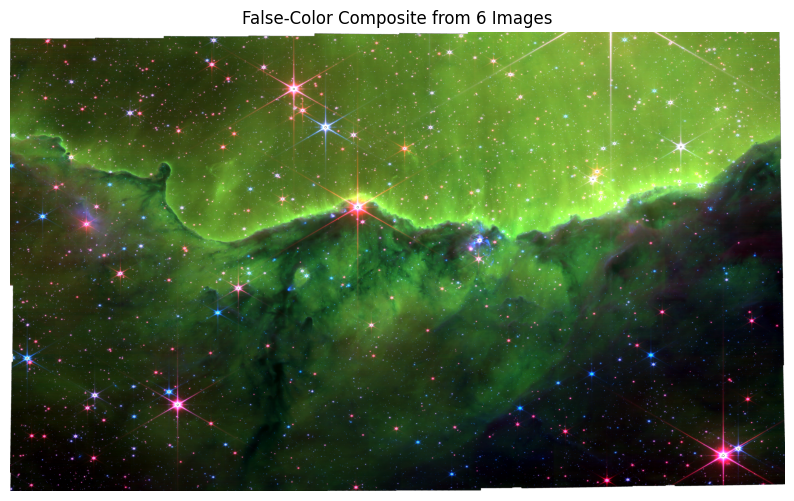

Done
Thank you and wishing you a nice Summer.


In [6]:
from reproject import reproject_interp
import matplotlib.image as mpimg
import os

# ---- 1. Load the reference image (foo.fits) ----
def load_reference(path):
    with fits.open(path) as hdul:
        ref_data = hdul['SCI'].data
        ref_header = hdul['SCI'].header
    ref_wcs = WCS(ref_header)
    return ref_data, ref_wcs, ref_header

# ---- 2. Reproject another FITS image to match the reference ----
def reproject_to_reference(target_path, ref_wcs, shape_out):
    with fits.open(target_path) as hdul:
        data = hdul['SCI'].data
        header = hdul['SCI'].header
        wcs = WCS(header)
    reprojected_data, _ = reproject_interp((data, wcs), ref_wcs, shape_out=shape_out)
    return reprojected_data

# ---- 3. Normalize to 0–1 range using percentiles ----
def normalize_image(data):
    vmin, vmax = np.nanpercentile(data, [1, 99])
    if vmax - vmin < 1e-6:
        return np.zeros_like(data)
    return np.clip((data - vmin) / (vmax - vmin), 0, 1)

# ---- 4. Main routine ----
def make_false_color_image(reference_file, image_files, output_file):
    print("Loading reference WCS from:", reference_file)
    ref_data, ref_wcs, _ = load_reference(reference_file)
    shape_out = ref_data.shape

    rgb_images = []
    count = 1
    for f in image_files:
        print(f"{count} --> Reprojecting: {f}")
        reproj = reproject_to_reference(f, ref_wcs, shape_out)
        norm = normalize_image(reproj)
        rgb_images.append(norm)
        count += 1

    if len(rgb_images) < 3:
        raise RuntimeError("Need at least 3 images for RGB composite")

    R, G, B = rgb_images[:3]
    rgb = np.stack([R, G, B], axis=-1)

    print(f"Saving RGB composite to {output_file}")
    plt.imsave(output_file, rgb, origin='lower')

# ---- 5. File paths ----
# --- Run it with your 6 JWST image paths ---
path = "data"
p1 = os.path.join(path, "file1", "jw02731-o001_t017_nircam_clear-f090w_i2d_reproj.fits")
p2 = os.path.join(path, "file2", "jw02731-o001_t017_nircam_clear-f187n_i2d_reproj.fits")
p3 = os.path.join(path, "file3", "jw02731-o001_t017_nircam_clear-f200w_i2d_reproj.fits")
p4 = os.path.join(path, "file4", "jw02731-o001_t017_nircam_clear-f335m_i2d_reproj.fits")
p5 = os.path.join(path, "file5", "jw02731-o001_t017_nircam_clear-f444w_i2d_reproj.fits")
p6 = os.path.join(path, "file6", "jw02731-o001_t017_nircam_f444w-f470n_i2d_reproj.fits")

reference_file = p1
image_files = [p1, p2, p3, p4, p5, p6]
output_file = "Final-3-colors-6-images.png"

make_false_color_image(reference_file, image_files, output_file)

print("Displaying the BEAUTIFUL final image...")
img = mpimg.imread(output_file)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.title("False-Color Composite from 6 Images")
plt.show()
print("Done")
print("Thank you and wishing you a nice Summer.")